# Task 2 - Prediction using Unsupervised ML #

## From the given ‘Iris’ dataset, predict the optimum number of clustersand represent it visually.

## by Anshul kumar Chaudhary

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns =  iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0,1,2,3]].values

cluster_sum = []

for i in range(1,11):
    kmc = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmc.fit(x)
    cluster_sum.append(kmc.inertia_)

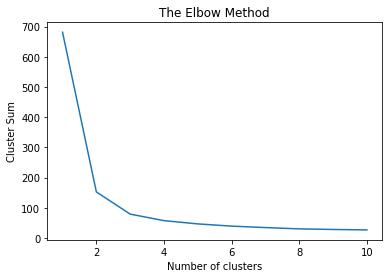

In [8]:
# Plotting the results onto a line graph, 
plt.plot(range(1,11), cluster_sum)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum')
plt.show()

### from graph its clear that we have to use number of clusters =3

In [9]:
# Applying kmeans to the dataset as kmc3 
kmc3 = KMeans(n_clusters=3)
y_kmc3 = kmc3.fit_predict(x)
kmc.cluster_centers_

array([[4.81818182, 3.23636364, 1.43333333, 0.23030303],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [7.64285714, 3.22857143, 6.5       , 2.2       ],
       [5.96875   , 2.8625    , 4.4125    , 1.38125   ],
       [6.56190476, 3.11428571, 5.52380952, 2.18095238],
       [5.37058824, 3.8       , 1.51764706, 0.27647059],
       [7.15      , 2.9       , 5.98333333, 1.83333333],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.65454545, 3.04545455, 4.66363636, 1.47272727],
       [5.57647059, 2.59411765, 3.98235294, 1.21764706]])

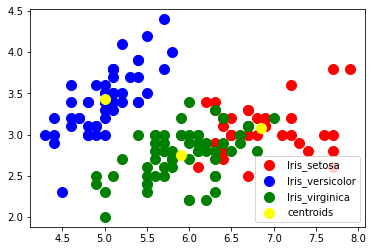

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmc3 == 0, 0], x[y_kmc3 == 0, 1], s = 100, c = 'red', label = 'Iris_setosa')
plt.scatter(x[y_kmc3 == 1, 0], x[y_kmc3 == 1, 1], s = 100, c = 'blue', label = 'Iris_versicolor')
plt.scatter(x[y_kmc3 == 2, 0], x[y_kmc3 == 2, 1], s = 100, c = 'green', label = 'Iris_virginica')

plt.scatter(kmc3.cluster_centers_[:,0], kmc3.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'centroids')

plt.legend()